# RNN - Clasificación de Texto
- Objetivo: Implementar RNN y LSTM para la clasificación de secuencias (texto). Aplicar inicialización de pesos y dropout en modelos recurrentes. Se comparará una RNN profunda con una LSTM de una capa.

- Conocer efectos de inicialización y dropout en RNN y comparar con MLP
- Conocer diferentes implemetaciones de RNN


![RNN](img/1.png)

## Redes Neuronales Recurrentes


- Cada capa en cada iteración comparte parámetros

- 'sparse_categorical_crossentropy' se utiliza para varias clases


## Leer Dataset

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, SimpleRNN
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

##  11,228 noticias de Reuters, con más de 46 temas.

In [2]:
# parámetros 
emb_dim = 256
num_words = 10000
max_words = 100


In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = num_words, maxlen=max_words)

## Temas

In [4]:
y_test[:1000]

array([23,  3, 19,  3,  3,  3,  9,  3,  3,  3,  1, 19,  4, 40,  1,  4,  3,
        4,  3, 20,  3,  4, 20,  4,  3,  4,  4,  4,  3,  3,  3, 21, 16,  3,
        2,  3, 39,  4,  3,  3,  3,  1,  3,  3,  4,  3,  3,  3,  1, 20,  3,
        3,  4,  3,  4,  4,  3,  4,  3,  4, 19,  4, 18,  3, 19,  3,  3, 19,
        3,  3, 23,  4,  3,  3,  3,  3,  4,  4,  3, 11,  3, 41,  3,  3,  2,
        4,  3, 10,  3,  3,  3, 18,  3,  3, 19,  3,  3,  3,  3,  3, 36,  8,
        3,  4,  4, 19,  3,  4,  4, 19,  2,  3,  4,  3,  3,  3,  4,  3,  3,
        3, 13,  3,  3,  4, 19,  1,  3,  3, 13,  4,  4,  3,  3, 19,  3,  4,
        3,  3,  4, 26,  4,  4,  3,  4,  4,  3,  3, 20,  3, 19,  4,  3,  3,
        3, 10,  3, 25,  1,  4,  4,  4,  3,  6,  3,  3,  3,  4, 35,  3,  3,
        3,  3,  4,  4,  3,  3, 26, 24,  3,  4,  3,  4,  3, 17,  4,  3,  3,
       43,  3,  4, 10, 21,  3,  3,  3, 38,  3,  3,  3, 16,  3,  4,  3, 44,
        3,  3, 16,  4,  3,  3,  3,  4,  3,  3,  4,  3,  1, 24,  3, 41,  3,
        3,  3,  3, 19,  3

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4777,)
(1195,)
(4777,)
(1195,)


In [6]:
print('Noticia')
print(x_train[0])
print('Etiqueta')
print(y_train[0])

Noticia
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Etiqueta
3


## Palabras de noticia

In [7]:
wordDict = {y:x for x,y in reuters.get_word_index().items()}  
res = []
for index in x_train[0]:
    res.append(wordDict.get(index - 3))
print('Noticia: ',res,'Longitud noticia: ', len(res))

Noticia:  [None, None, None, 'said', 'as', 'a', 'result', 'of', 'its', 'december', 'acquisition', 'of', 'space', 'co', 'it', 'expects', 'earnings', 'per', 'share', 'in', '1987', 'of', '1', '15', 'to', '1', '30', 'dlrs', 'per', 'share', 'up', 'from', '70', 'cts', 'in', '1986', 'the', 'company', 'said', 'pretax', 'net', 'should', 'rise', 'to', 'nine', 'to', '10', 'mln', 'dlrs', 'from', 'six', 'mln', 'dlrs', 'in', '1986', 'and', 'rental', 'operation', 'revenues', 'to', '19', 'to', '22', 'mln', 'dlrs', 'from', '12', '5', 'mln', 'dlrs', 'it', 'said', 'cash', 'flow', 'per', 'share', 'this', 'year', 'should', 'be', '2', '50', 'to', 'three', 'dlrs', 'reuter', '3'] Longitud noticia:  87


In [8]:
x_train = pad_sequences(x_train, maxlen=max_words, padding = 'post')
x_test = pad_sequences(x_test, maxlen=max_words, padding = 'post')

In [9]:
epoch = 40
verbose = 1
batch = 50

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4777, 100)
(1195, 100)
(4777,)
(1195,)


## Deep RNN 
- Cuando se conectan varias capas de RNNs se modifica el parámetro 'return_sequences'
- Se inicializan los pesos con 'glorot_uniform'

In [11]:
def deep_rnn():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(SimpleRNN(32, return_sequences = True, recurrent_initializer='glorot_uniform'))
    model.add(SimpleRNN(32, return_sequences = False, recurrent_initializer='glorot_uniform'))
    model.add(Dense(46, activation = 'softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [12]:
model = deep_rnn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         2560000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          9248      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 46)                1518      
Total params: 2,572,846
Trainable params: 2,572,846
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 3343 samples, validate on 1434 samples
Epoch 1/40
3343/3343 [==============================] - 9s 3ms/sample - loss: 2.4251 - accuracy: 0.4744 - val_loss: 1.7870 - val_accuracy: 0.5732
Epoch 2/40
3343/3343 [==============================] - 8s 2ms/sample - loss: 1.6702 - accuracy: 0.6228 - val_loss: 1.5789 - val_accuracy: 0.6269
Epoch 3/40
3343/3343 [==============================] - 8s 2ms/sample - loss: 1.4253 - accuracy: 0.6722 - val_loss: 1.5684 - val_accuracy: 0.6123
Epoch 4/40
3343/3343 [==============================] - 8s 2ms/sample - loss: 1.2708 - accuracy: 0.7045 - val_loss: 1.5468 - val_accuracy: 0.6430
Epoch 5/40
3343/3343 [==============================] - 8s 2ms/sample - loss: 1.1412 - accuracy: 0.7302 - val_loss: 1.5658 - val_accuracy: 0.6423
Epoch 6/40
3343/3343 [==============================] - 8s 2ms/sample - loss: 1.0698 - accuracy: 0.7430 - val_loss: 1.6252 - val_accuracy: 0.6346
Epoch 7/40
3343/3343 [==============================] - 8s 2ms/sample - loss

In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

1195/1 - 1s - loss: 1.9598 - accuracy: 0.5799

Test acccuracy: 0.5799163


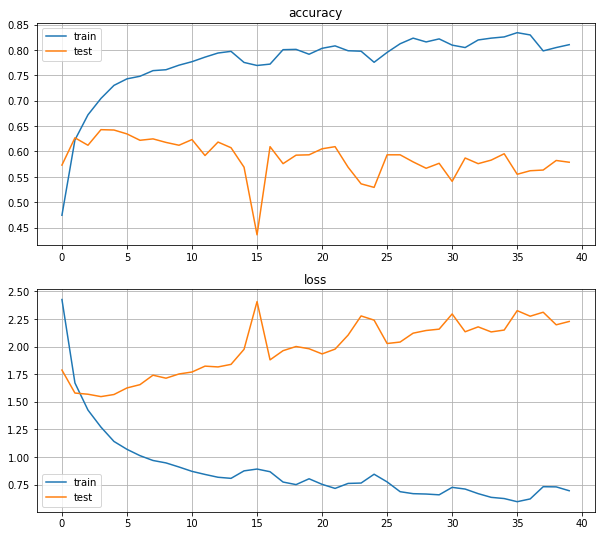

In [15]:
#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()




plt.show()

## LSTM
- Desempeño de LSTM con una capa vs. deep RNN


In [16]:
def lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(LSTM(32, return_sequences = False))
    model.add(Dense(46, activation = 'softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [17]:
model = lstm()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                36992     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                1518      
Total params: 2,598,510
Trainable params: 2,598,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 3343 samples, validate on 1434 samples
Epoch 1/40
3343/3343 [==============================] - 5s 1ms/sample - loss: 2.5167 - accuracy: 0.4804 - val_loss: 1.8952 - val_accuracy: 0.5077
Epoch 2/40
3343/3343 [==============================] - 3s 758us/sample - loss: 1.9191 - accuracy: 0.4960 - val_loss: 1.8391 - val_accuracy: 0.5077
Epoch 3/40
3343/3343 [==============================] - 3s 762us/sample - loss: 1.8095 - accuracy: 0.4978 - val_loss: 1.5914 - val_accuracy: 0.5098
Epoch 4/40
3343/3343 [==============================] - 3s 761us/sample - loss: 1.7238 - accuracy: 0.5202 - val_loss: 1.6081 - val_accuracy: 0.5411
Epoch 5/40
3343/3343 [==============================] - 3s 754us/sample - loss: 1.5878 - accuracy: 0.5319 - val_loss: 1.6108 - val_accuracy: 0.5314
Epoch 6/40
3343/3343 [==============================] - 3s 765us/sample - loss: 1.6942 - accuracy: 0.5115 - val_loss: 1.5840 - val_accuracy: 0.5230
Epoch 7/40
3343/3343 [==============================] - 3s 763us/s

In [19]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

1195/1 - 0s - loss: 0.9080 - accuracy: 0.7255

Test acccuracy: 0.725523


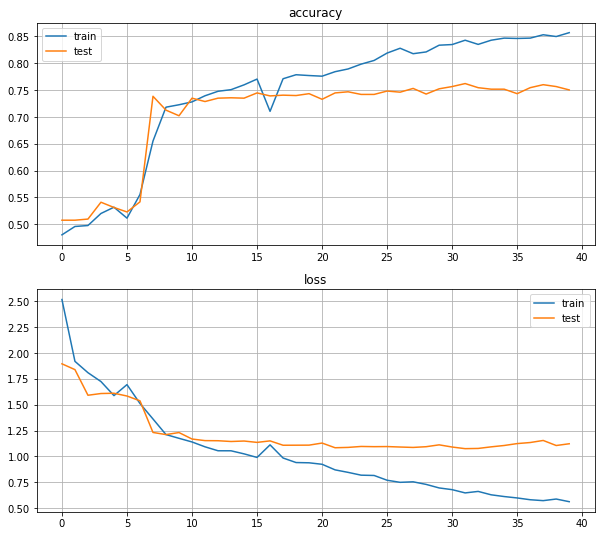

In [20]:
#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()




plt.show()

## Deep LSTM
- LSTM cuentan inicializador 'orthogonal' por defecto

In [21]:
def deep_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(LSTM(32, return_sequences = True, recurrent_initializer='orthogonal'))
    model.add(LSTM(32, return_sequences = False, recurrent_initializer='orthogonal'))
    model.add(Dense(46, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [22]:
model = deep_lstm()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          36992     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                1518      
Total params: 2,606,830
Trainable params: 2,606,830
Non-trainable params: 0
_________________________________________________________________


In [23]:
history1 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 3343 samples, validate on 1434 samples
Epoch 1/40
3343/3343 [==============================] - 6s 2ms/sample - loss: 2.4989 - accuracy: 0.4855 - val_loss: 1.8817 - val_accuracy: 0.5077
Epoch 2/40
3343/3343 [==============================] - 3s 831us/sample - loss: 1.9301 - accuracy: 0.4957 - val_loss: 1.8558 - val_accuracy: 0.5077
Epoch 3/40
3343/3343 [==============================] - 3s 833us/sample - loss: 1.9158 - accuracy: 0.4957 - val_loss: 1.8399 - val_accuracy: 0.5077
Epoch 4/40
3343/3343 [==============================] - 3s 827us/sample - loss: 1.6895 - accuracy: 0.5878 - val_loss: 1.4717 - val_accuracy: 0.6548
Epoch 5/40
3343/3343 [==============================] - 3s 819us/sample - loss: 1.4778 - accuracy: 0.6476 - val_loss: 1.3769 - val_accuracy: 0.6771
Epoch 6/40
3343/3343 [==============================] - 3s 817us/sample - loss: 1.3521 - accuracy: 0.6683 - val_loss: 1.2451 - val_accuracy: 0.6897
Epoch 7/40
3343/3343 [==============================] - 3s 823us/s

In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

1195/1 - 0s - loss: 1.1259 - accuracy: 0.7364

Test acccuracy: 0.7364017


- Modificando inicializador 

In [25]:
def deep_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(LSTM(32, return_sequences = True, recurrent_initializer='glorot_uniform'))
    model.add(LSTM(32, return_sequences = False, recurrent_initializer='glorot_uniform'))
    model.add(Dense(46, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [26]:
model = deep_lstm()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 32)          36992     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                1518      
Total params: 2,606,830
Trainable params: 2,606,830
Non-trainable params: 0
_________________________________________________________________


In [27]:
history2 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = 40, verbose = verbose)

Train on 3343 samples, validate on 1434 samples
Epoch 1/40
3343/3343 [==============================] - 6s 2ms/sample - loss: 2.5700 - accuracy: 0.4762 - val_loss: 1.8989 - val_accuracy: 0.5077
Epoch 2/40
3343/3343 [==============================] - 3s 820us/sample - loss: 1.9325 - accuracy: 0.4957 - val_loss: 1.8598 - val_accuracy: 0.5077
Epoch 3/40
3343/3343 [==============================] - 3s 831us/sample - loss: 1.9176 - accuracy: 0.4957 - val_loss: 1.8560 - val_accuracy: 0.5077
Epoch 4/40
3343/3343 [==============================] - 3s 818us/sample - loss: 1.9162 - accuracy: 0.4957 - val_loss: 1.8555 - val_accuracy: 0.5077
Epoch 5/40
3343/3343 [==============================] - 3s 820us/sample - loss: 1.9131 - accuracy: 0.4957 - val_loss: 1.8387 - val_accuracy: 0.5077
Epoch 6/40
3343/3343 [==============================] - 3s 820us/sample - loss: 1.6857 - accuracy: 0.5890 - val_loss: 1.4394 - val_accuracy: 0.6904
Epoch 7/40
3343/3343 [==============================] - 3s 824us/s

In [28]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

1195/1 - 0s - loss: 0.8521 - accuracy: 0.7506

Test acccuracy: 0.75062764


- Recurrent dropout

In [39]:
def deep_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(LSTM(32, return_sequences = True, recurrent_initializer='glorot_uniform',
                  recurrent_dropout=0.05))
    model.add(LSTM(32, return_sequences = False, recurrent_initializer='glorot_uniform',
                  recurrent_dropout=0.05))
    model.add(Dense(46, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [40]:
model = deep_lstm()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 32)          36992     
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                1518      
Total params: 2,606,830
Trainable params: 2,606,830
Non-trainable params: 0
_________________________________________________________________


In [41]:
history3 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 3343 samples, validate on 1434 samples
Epoch 1/40
3343/3343 [==============================] - 15s 5ms/sample - loss: 2.5300 - accuracy: 0.4807 - val_loss: 1.8767 - val_accuracy: 0.5077
Epoch 2/40
3343/3343 [==============================] - 13s 4ms/sample - loss: 1.7890 - accuracy: 0.5423 - val_loss: 1.4925 - val_accuracy: 0.6583
Epoch 3/40
3343/3343 [==============================] - 13s 4ms/sample - loss: 1.5052 - accuracy: 0.6473 - val_loss: 1.3544 - val_accuracy: 0.6597
Epoch 4/40
3343/3343 [==============================] - 13s 4ms/sample - loss: 1.4009 - accuracy: 0.6512 - val_loss: 1.2800 - val_accuracy: 0.6778
Epoch 5/40
3343/3343 [==============================] - 13s 4ms/sample - loss: 1.2882 - accuracy: 0.6838 - val_loss: 1.2168 - val_accuracy: 0.7127
Epoch 6/40
3343/3343 [==============================] - 13s 4ms/sample - loss: 1.2742 - accuracy: 0.6847 - val_loss: 1.1966 - val_accuracy: 0.7211
Epoch 7/40
3343/3343 [==============================] - 13s 4ms/sample

In [42]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

1195/1 - 2s - loss: 0.7249 - accuracy: 0.7556

Test acccuracy: 0.75564855


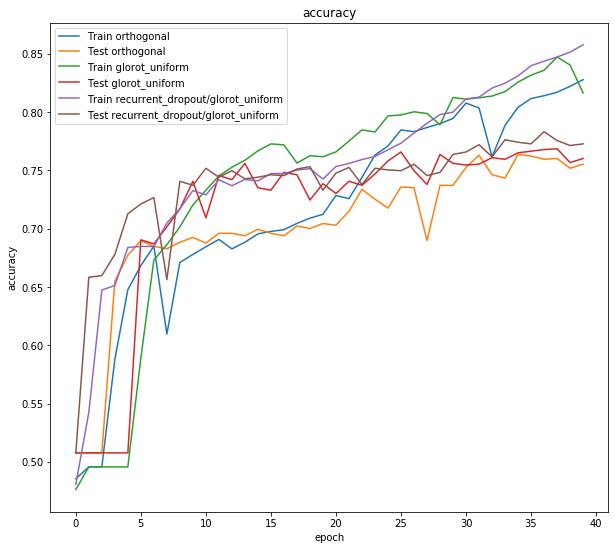

In [43]:
#plot
plt.figure(figsize=(10,9))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])


plt.legend(['Train orthogonal', 'Test orthogonal',
            'Train glorot_uniform', 'Test glorot_uniform',
            'Train recurrent_dropout/glorot_uniform', 'Test recurrent_dropout/glorot_uniform'])

plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

- Mejorar test accuracy
- Investigar que son las GRU e implementarlas
- Experimentar con diferente número de capas y neuronas, mejorar los resultados
- Experimentar otros inicializadores y diferentes valores de dropout
- Probar con otro dataset